#### 12/8/2020
## COMP 541 - Assignment 4 - Team 6
### Table of Contents:
* [1. Preparing the Data](#1)
* &emsp;[1.1. Importing Libraries](#11)
* [2. Data Cleaning](#2)
* &emsp;[2.1. Identifying Missing Values](#21)
* &emsp;[2.2. Dealing with Missing Values](#22)
* &emsp;[2.3. Removing Rows](#23)
* &emsp;[2.4. Finding Outliers](#24)
* &emsp;&emsp;[2.4.1. IQR Score Method](#241)
* &emsp;[2.5. Box Plot](#25)
* [3. Data Transformation](#3)
* &emsp;[3.1. Binning](#31)
* &emsp;[3.2. Normalization](#32)
* &emsp;&emsp;[3.2.1. Z-score Method](#33)
* [4. Results](#4)
* &emsp;[4.1. Data Cleaning](#41)
* &emsp;[4.2. Data Transformation](#42)

# 1. Preparing the Data <a class="anchor" id="1"></a>

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [49]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline  
plt.style.use('fivethirtyeight')

# 2. Data Cleaning <a class="anchor" id="2"></a>

## 2.1. Identifying Missing Values <a class="anchor" id="21"></a>

In [50]:
df = pd.read_csv('data/raw_training_data.csv')

In [51]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','adult','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
target_features = ['isprofit','profitability_ratio']

In [52]:
df.shape # (# rows, # cols)

(3524, 32)

In [53]:
df.head() # take a peak at the dataset

,Unnamed: 0,budget,company,country,director,genre,gross,name,rating,released,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22.08.1986 00:00,...,Stand by Me,"After the death of a friend, a writer recounts...",15.206957,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",en,US,"based on novel, friendship, coming of age, rai...",1986
1,1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,...,Ferris Bueller's Day Off,Charismatic teen Ferris Bueller plays hooky in...,12.724645,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,en,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,PG,16.05.1986 00:00,...,Top Gun,For Lieutenant Pete 'Maverick' Mitchell and hi...,20.301019,Up there with the best of the best.,Top Gun,"Action, Romance, War",en,US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,R,18.07.1986 00:00,...,Aliens,When Ripley's lifepod is found by a salvage cr...,21.761179,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction",en,"GB, US","android, extraterrestrial technology, space ma...",1986
4,4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,PG,1.08.1986 00:00,...,Flight of the Navigator,This 1986 Disney adventure tells the story of ...,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",en,US,"artificial intelligence, farewell, homesicknes...",1986


In [54]:
del df['Unnamed: 0']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3524 non-null   int64  
 1   company                      3524 non-null   object 
 2   country                      3524 non-null   object 
 3   director                     3524 non-null   object 
 4   genre                        3524 non-null   object 
 5   gross                        3524 non-null   int64  
 6   name                         3524 non-null   object 
 7   rating                       3524 non-null   object 
 8   released                     3524 non-null   object 
 9   runtime                      3524 non-null   int64  
 10  score                        3524 non-null   float64
 11  star                         3524 non-null   object 
 12  votes                        3524 non-null   int64  
 13  writer            

In [56]:
df.isnull().sum()

budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
rating                           0
released                         0
runtime                          0
score                            0
star                             0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
overview                         1
popularity                       0
tagline                        371
title                            0
genres_edited                    0
spoken_languages_edited          7
production_countries

In [57]:
df.describe()   # before replacing zero with None

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 2.2. Dealing with Missing Values <a class="anchor" id="22"></a>

By observing the data, we see that only the following columns need initial transformation to replace zeros with the value None:
* overview
* tagline
* spoken_languages_edited
* production_countries_edited
* keywords_edited

And the remaining features do not have to change since they do not contain zero values.

In [58]:
df['overview'] = df['overview'].map(lambda x:x if x != 0 else None)
df['tagline'] = df['tagline'].map(lambda x:x if x != 0 else None)
df['spoken_languages_edited'] = df['spoken_languages_edited'].map(lambda x:x if x != 0 else None)
df['production_countries_edited'] = df['production_countries_edited'].map(lambda x:x if x != 0 else None)
df['keywords_edited'] = df['keywords_edited'].map(lambda x:x if x != 0 else None)

In [59]:
df.head()   # take a peak at the dataset

,budget,company,country,director,genre,gross,name,rating,released,runtime,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22.08.1986 00:00,89,...,Stand by Me,"After the death of a friend, a writer recounts...",15.206957,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",en,US,"based on novel, friendship, coming of age, rai...",1986
1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,103,...,Ferris Bueller's Day Off,Charismatic teen Ferris Bueller plays hooky in...,12.724645,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,en,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,PG,16.05.1986 00:00,110,...,Top Gun,For Lieutenant Pete 'Maverick' Mitchell and hi...,20.301019,Up there with the best of the best.,Top Gun,"Action, Romance, War",en,US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,R,18.07.1986 00:00,137,...,Aliens,When Ripley's lifepod is found by a salvage cr...,21.761179,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction",en,"GB, US","android, extraterrestrial technology, space ma...",1986
4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,PG,1.08.1986 00:00,90,...,Flight of the Navigator,This 1986 Disney adventure tells the story of ...,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",en,US,"artificial intelligence, farewell, homesicknes...",1986


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3524 non-null   int64  
 1   company                      3524 non-null   object 
 2   country                      3524 non-null   object 
 3   director                     3524 non-null   object 
 4   genre                        3524 non-null   object 
 5   gross                        3524 non-null   int64  
 6   name                         3524 non-null   object 
 7   rating                       3524 non-null   object 
 8   released                     3524 non-null   object 
 9   runtime                      3524 non-null   int64  
 10  score                        3524 non-null   float64
 11  star                         3524 non-null   object 
 12  votes                        3524 non-null   int64  
 13  writer            

In [61]:
df.isnull().sum()

budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
rating                           0
released                         0
runtime                          0
score                            0
star                             0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
overview                         1
popularity                       0
tagline                        371
title                            0
genres_edited                    0
spoken_languages_edited          7
production_countries

In [62]:
df.describe()   # after replacing zero with None

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 2.3. Removing Rows <a class="anchor" id="23"></a>

In [63]:
data_dropped = df.dropna()

In [64]:
data_dropped = data_dropped.reset_index() 
del data_dropped['index']

In [65]:
data_dropped.shape

(3031, 31)

In [66]:
df.shape

(3524, 31)

In [67]:
num_rows_lost = round(100*(df.shape[0] - data_dropped.shape[0])/float(df.shape[0]))

In [68]:
template = 'retained {}% of rows'
template.format(num_rows_lost)

'retained 14% of rows'

In [69]:
# class distribution
class_counts = data_dropped.groupby('isprofit').size()
class_counts

isprofit
0    1415
1    1616
dtype: int64

In [70]:
class_counts[0]/df['isprofit'].size

0.40153234960272416

In [71]:
df['isprofit'].value_counts(normalize=True)   #  split of trues and falses before rows dropped

1    0.510499
0    0.489501
Name: isprofit, dtype: float64

In [72]:
data_dropped['isprofit'].value_counts(normalize=True)   #  split of trues and falses after rows dropped

1    0.533157
0    0.466843
Name: isprofit, dtype: float64

In [74]:
data_dropped.describe()   # after removing rows which include NaN

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.031000e+03,3.031000e+03,3031.000000,3031.000000,3.031000e+03,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,3.928010e+07,5.255955e+07,107.612339,6.364104,1.103006e+05,1996.590564,0.533157,4.551640,455.109535,44312.161663,10.382832,2002.659188
std,4.204987e+07,7.001274e+07,18.595233,1.058490,1.641818e+05,109.294767,0.498982,137.861924,13786.216469,76687.277269,14.114422,8.366027
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.200000e+07,9.976800e+06,96.000000,5.800000,2.027700e+04,1996.000000,0.000000,-0.490448,-50.000000,8306.500000,6.330036,1996.000000
50%,2.500000e+07,3.010272e+07,104.000000,6.500000,5.418800e+04,2003.000000,1.000000,0.078483,10.000000,11622.000000,8.936547,2003.000000
75%,5.000000e+07,6.694456e+07,117.000000,7.100000,1.308230e+05,2010.000000,1.000000,1.082718,110.000000,39033.000000,12.116273,2010.000000
max,3.000000e+08,9.366622e+08,219.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


In [75]:
# % change in means of columns before and after dropping missing-value rows
change_in_means = ((data_dropped.mean() - df.mean()) / df.mean() * 100).round(2)
change_in_means

budget                         7.71
gross                         10.13
runtime                        0.39
score                          0.40
votes                         11.10
year                          -0.03
isprofit                       4.44
profitability_ratio           13.88
profitability_ratio_bucket    13.89
id                            -2.49
popularity                     6.10
year_released                  0.01
dtype: float64

### Bar Chart of the Change in Means

Text(0, 0.5, '% change')

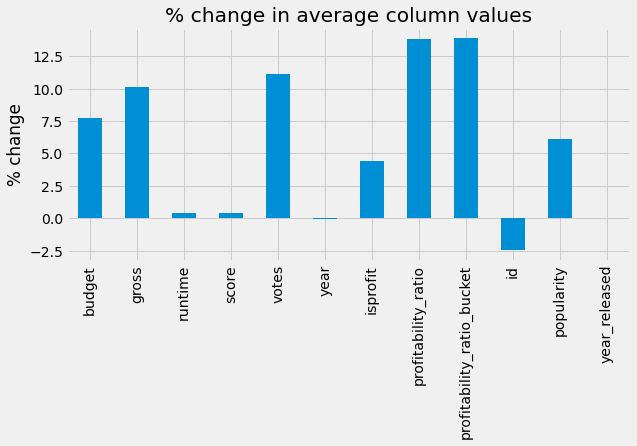

In [76]:
plt.figure(figsize=(9, 4))
change_in_means.plot.bar(title='% change in average column values')
plt.ylabel('% change')


Figure 1: Percent change in average column values
<p>Figure 1 shows the percent change in mean of columns before and after dropping missing-value rows.</p>

## 2.4. Finding Outliers <a class="anchor" id="24"></a>

### 2.4.1. IQR Score Method <a class="anchor" id="241"></a>

In [77]:
Q1 = data_dropped.quantile(0.25)
Q3 = data_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                        3.800000e+07
gross                         5.696776e+07
runtime                       2.100000e+01
score                         1.300000e+00
votes                         1.105460e+05
year                          1.400000e+01
isprofit                      1.000000e+00
profitability_ratio           1.573166e+00
profitability_ratio_bucket    1.600000e+02
id                            3.072650e+04
popularity                    5.786237e+00
year_released                 1.400000e+01
dtype: float64


In [78]:
print((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR)))

      adult  budget  company  country  director  genre  genres_edited  gross  \
0     False   False    False    False     False  False          False  False   
1     False   False    False    False     False  False          False  False   
2     False   False    False    False     False  False          False   True   
3     False   False    False    False     False  False          False  False   
4     False   False    False    False     False  False          False  False   
...     ...     ...      ...      ...       ...    ...            ...    ...   
3026  False   False    False    False     False  False          False  False   
3027  False   False    False    False     False  False          False  False   
3028  False   False    False    False     False  False          False  False   
3029  False   False    False    False     False  False          False  False   
3030  False   False    False    False     False  False          False  False   

         id  imdb_id  ...  runtime  sco

In [79]:
data_dropped.shape

(3031, 31)

In [80]:
data_dropped_outlier_IQR = data_dropped[~((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

In [81]:
data_dropped_outlier_IQR.shape

(1993, 31)

In [82]:
data_dropped_outlier_IQR = data_dropped_outlier_IQR.reset_index()
del data_dropped_outlier_IQR['index']
data_dropped_outlier_IQR

,budget,company,country,director,genre,gross,name,rating,released,runtime,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,PG,1.08.1986 00:00,90,...,Flight of the Navigator,This 1986 Disney adventure tells the story of ...,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",en,US,"artificial intelligence, farewell, homesicknes...",1986
1,6000000,Other,USA,Other,Drama,8551228,Blue Velvet,R,23.10.1986 00:00,120,...,Blue Velvet,The discovery of a severed human ear found in ...,7.882247,It's a strange world.,Blue Velvet,"Crime, Drama, Mystery, Thriller",en,US,"small town, ear, suspense, independent film, p...",1986
2,16000000,Other,Other,Other,Action,5900000,Highlander,R,7.03.1986 00:00,116,...,Highlander,He fought his first battle on the Scottish Hig...,16.870392,There can be only one.,Highlander,"Adventure, Action, Fantasy",en,"GB, US","new york, scotland, swordplay, sword, cut-off ...",1986
3,6000000,Twentieth Century Fox Film Corporation,USA,Other,Comedy,8200000,Lucas,PG-13,28.03.1986 00:00,100,...,Lucas,A socially inept fourteen year old experiences...,4.575350,It's about falling in love. For the first time.,Lucas,"Comedy, Drama, Romance",en,US,"high school, american football team, cheerleading",1986
4,25000000,Twentieth Century Fox Film Corporation,USA,Other,Action,11100000,Big Trouble in Little China,PG-13,2.07.1986 00:00,99,...,Big Trouble in Little China,"When trucker, Jack Burton agreed to take his f...",11.109932,Adventure doesn't come any bigger!,Big Trouble in Little China,"Action, Adventure, Comedy, Fantasy","cn, en",US,"kung fu, chinatown, magic, mystery",1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,25000000,Other,USA,Other,Action,100144,Man of Tai Chi,R,5.07.2013 00:00,105,...,Man of Tai Chi,"In Beijing, a young martial artist's skill pla...",11.829231,No Rules. No Mercy. Pure Fighting.,Man of Tai Chi,"Action, Drama","cn, en, zh","CN, HK, US","china, martial arts, tai chi, extortion, illeg...",2013
1989,65000000,Other,USA,Other,Crime,13757804,Sin City: A Dame to Kill For,R,22.08.2014 00:00,102,...,Sin City: A Dame to Kill For,Some of Sin City's most hard-boiled citizens c...,20.623642,There is no justice without sin.,Sin City: A Dame to Kill For,"Crime, Thriller",en,US,"detective, dystopia, dominatrix, murder, suspe...",2014
1990,70000000,Universal Pictures,USA,Other,Action,56280355,Dracula Untold,PG-13,10.10.2014 00:00,92,...,Dracula Untold,"Vlad Tepes is a great hero, but when he learns...",16.316318,Every bloodline has a beginning,Dracula Untold,"Horror, Action, Drama, Fantasy, War",en,US,"vampire, dracula, bite, battle, 15th century, ...",2014
1991,95000000,Other,USA,Other,Action,17223265,Seventh Son,PG-13,6.02.2015 00:00,102,...,Seventh Son,"John Gregory, who is a seventh son of a sevent...",15.297821,"When darkness falls, the son will rise. When t...",Seventh Son,"Adventure, Fantasy",en,"CN, CA, US, GB","magic, chosen one, dark fantasy, witch hunter,...",2015


In [83]:
data_dropped_outlier_IQR.describe()

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,1.993000e+03,1.993000e+03,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,3.049440e+07,3.242492e+07,105.378826,6.272554,61263.095334,2000.314099,0.462117,0.169192,16.883091,17145.391370,8.195990,2000.457602
std,2.346240e+07,3.171940e+07,14.072621,0.841085,62732.010952,7.199724,0.498688,0.987599,98.824948,17224.743122,3.553912,7.251044
min,5.000000e+04,3.090000e+02,69.000000,3.900000,704.000000,1986.000000,0.000000,-0.999979,-100.000000,5.000000,0.000578,1986.000000
25%,1.250000e+07,7.411659e+06,96.000000,5.700000,15964.000000,1995.000000,0.000000,-0.560395,-60.000000,8643.000000,5.739829,1995.000000
50%,2.500000e+07,2.251810e+07,103.000000,6.300000,38469.000000,2001.000000,0.000000,-0.091684,-10.000000,10982.000000,7.941972,2001.000000
75%,4.300000e+07,4.847801e+07,114.000000,6.900000,85499.000000,2006.000000,1.000000,0.657938,70.000000,20009.000000,10.580421,2007.000000
max,1.050000e+08,1.522575e+08,147.000000,8.200000,294996.000000,2015.000000,1.000000,3.438159,340.000000,84329.000000,20.623642,2015.000000


## 2.5. Box Plot <a class="anchor" id="25"></a>

### Boxplot of Initial Data

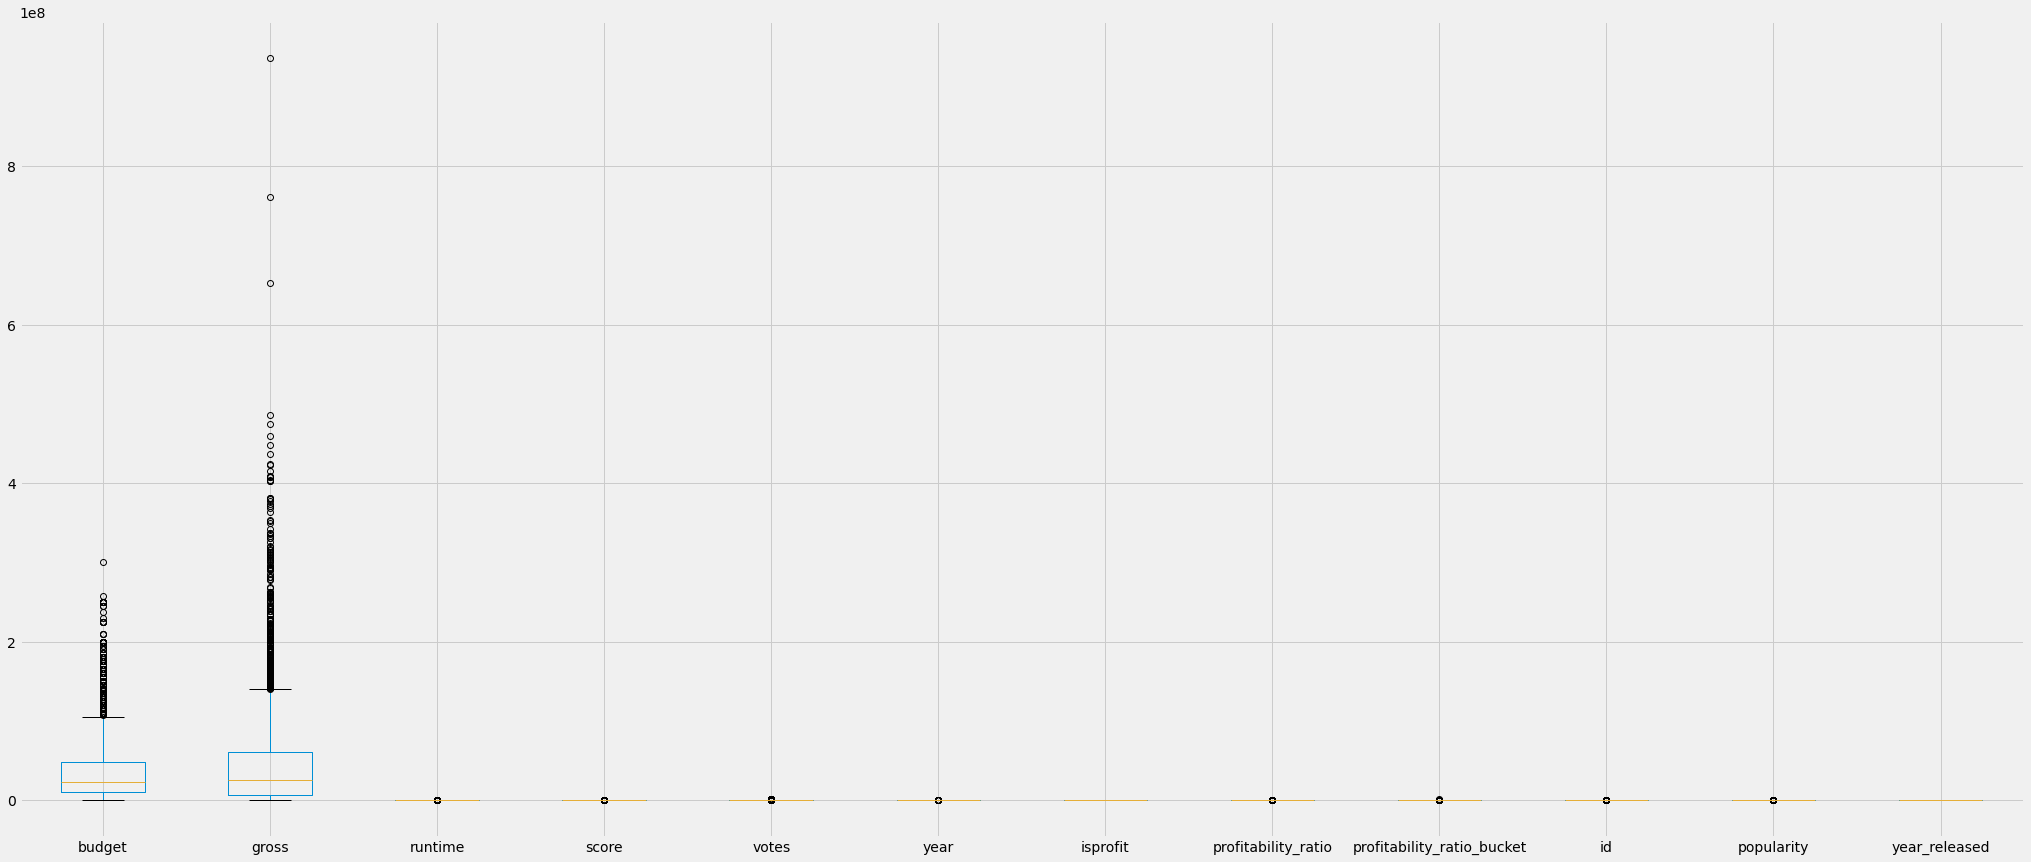

In [110]:
df.plot(x=df.index.name, kind='box', figsize=(32, 14))

Figure 2: Data Distribution before Cleaning
<p>Figure 2 shows the distribution of the data before dropping rows. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Data

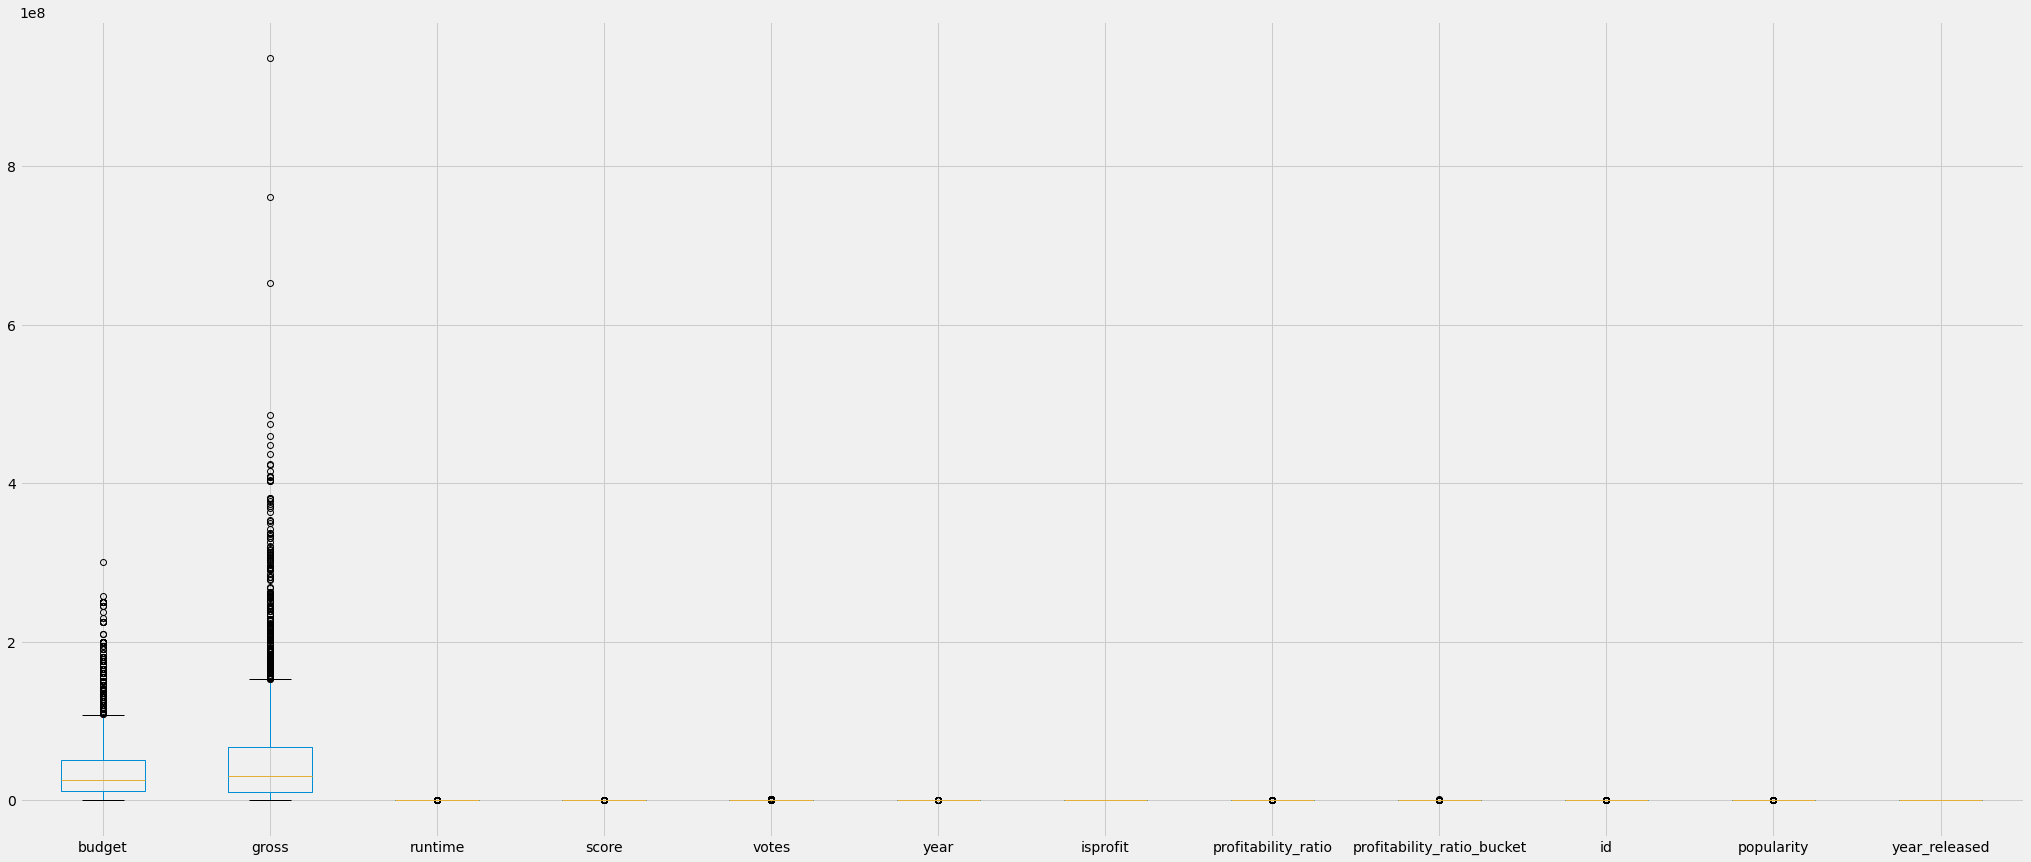

In [85]:
data_dropped.plot(x=data_dropped.index.name, kind='box', figsize=(32, 14))

Figure 3: Data Distribution of Dropped Data
<p>Figure 3 shows the distibution of data after dropping rows with the value NaN. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Outlier Data

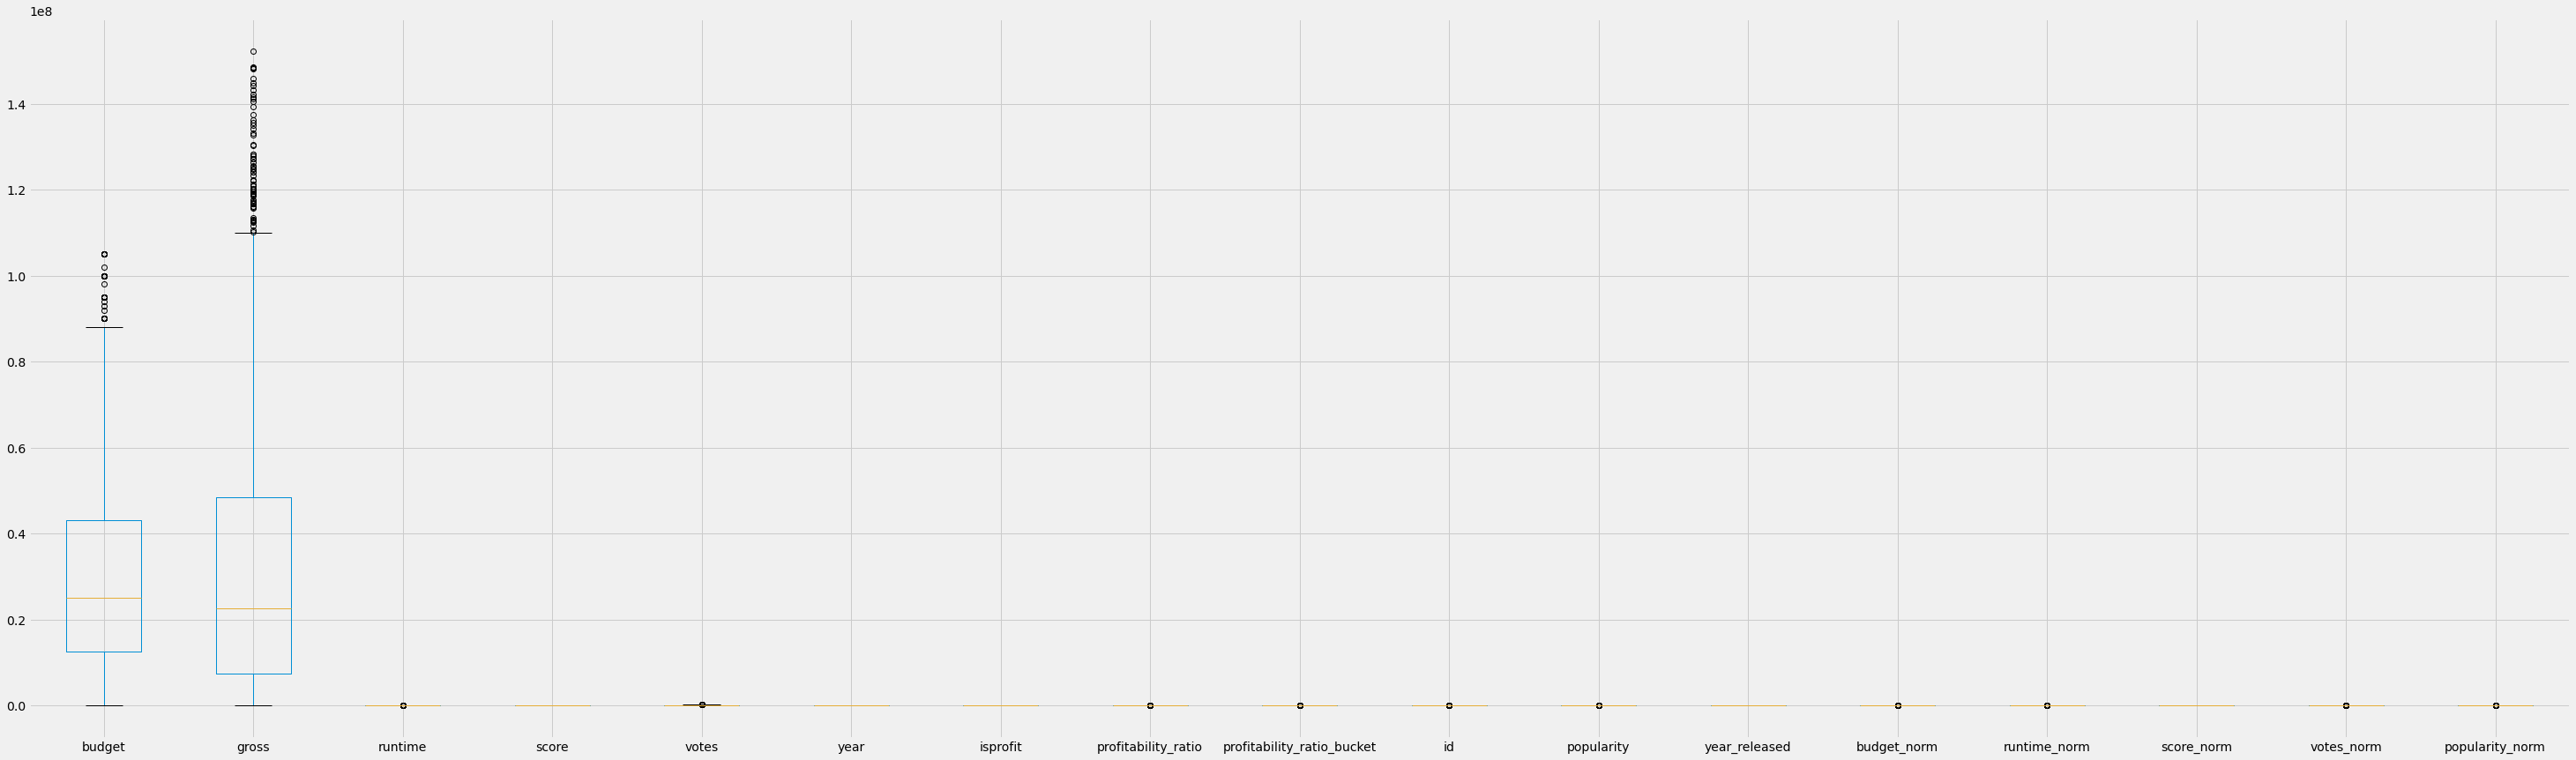

In [108]:
data_dropped_outlier_IQR.plot(x=data_dropped_outlier_IQR.index.name, kind='box', figsize=(46, 14))

Figure 4: Data Distribution of Outlier Data
<p>Figure 4 shows the distributoion of data after dropping outliers. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

# 3. Data Transformation <a class="anchor" id="3"></a>

Our data has the following columns that we can perform transformation on:
* budget
* runtime
* score
* votes
* popularity

<p>
> We want to discretize and normalize the data so it will be ready for the modeling stage.
<br><br>
> After writing some general functions, we will perform the transformations one by one.
</p>

## 3.1. Binning <a class="anchor" id="31"></a>

Below, we iterate over all continuous features and use binning to discretize the data. At the end, we summarize the results by indicating the 4 intervals that our data was partitioned into.

In [87]:
for i in continuous_features:
    display(data_dropped_outlier_IQR[i].describe())

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4))

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4).value_counts())

count    1.993000e+03
mean     3.049440e+07
std      2.346240e+07
min      5.000000e+04
25%      1.250000e+07
50%      2.500000e+07
75%      4.300000e+07
max      1.050000e+08
Name: budget, dtype: float64

0         (49999.999, 12500000.0]
1         (49999.999, 12500000.0]
2        (12500000.0, 25000000.0]
3         (49999.999, 12500000.0]
4        (12500000.0, 25000000.0]
                  ...            
1988     (12500000.0, 25000000.0]
1989    (43000000.0, 105000000.0]
1990    (43000000.0, 105000000.0]
1991    (43000000.0, 105000000.0]
1992     (25000000.0, 43000000.0]
Name: budget, Length: 1993, dtype: category
Categories (4, interval[float64]): [(49999.999, 12500000.0] < (12500000.0, 25000000.0] < (25000000.0, 43000000.0] < (43000000.0, 105000000.0]]

(12500000.0, 25000000.0]     565
(49999.999, 12500000.0]      503
(43000000.0, 105000000.0]    494
(25000000.0, 43000000.0]     431
Name: budget, dtype: int64

count    1993.000000
mean      105.378826
std        14.072621
min        69.000000
25%        96.000000
50%       103.000000
75%       114.000000
max       147.000000
Name: runtime, dtype: float64

0       (68.999, 96.0]
1       (114.0, 147.0]
2       (114.0, 147.0]
3        (96.0, 103.0]
4        (96.0, 103.0]
             ...      
1988    (103.0, 114.0]
1989     (96.0, 103.0]
1990    (68.999, 96.0]
1991     (96.0, 103.0]
1992    (103.0, 114.0]
Name: runtime, Length: 1993, dtype: category
Categories (4, interval[float64]): [(68.999, 96.0] < (96.0, 103.0] < (103.0, 114.0] < (114.0, 147.0]]

(68.999, 96.0]    549
(114.0, 147.0]    498
(103.0, 114.0]    481
(96.0, 103.0]     465
Name: runtime, dtype: int64

count    1993.000000
mean        6.272554
std         0.841085
min         3.900000
25%         5.700000
50%         6.300000
75%         6.900000
max         8.200000
Name: score, dtype: float64

0         (6.3, 6.9]
1         (6.9, 8.2]
2         (6.9, 8.2]
3         (6.3, 6.9]
4         (6.9, 8.2]
            ...     
1988      (5.7, 6.3]
1989      (6.3, 6.9]
1990      (5.7, 6.3]
1991    (3.899, 5.7]
1992      (5.7, 6.3]
Name: score, Length: 1993, dtype: category
Categories (4, interval[float64]): [(3.899, 5.7] < (5.7, 6.3] < (6.3, 6.9] < (6.9, 8.2]]

(3.899, 5.7]    530
(6.3, 6.9]      523
(5.7, 6.3]      491
(6.9, 8.2]      449
Name: score, dtype: int64

count      1993.000000
mean      61263.095334
std       62732.010952
min         704.000000
25%       15964.000000
50%       38469.000000
75%       85499.000000
max      294996.000000
Name: votes, dtype: float64

0        (15964.0, 38469.0]
1       (85499.0, 294996.0]
2       (85499.0, 294996.0]
3        (703.999, 15964.0]
4       (85499.0, 294996.0]
               ...         
1988     (15964.0, 38469.0]
1989    (85499.0, 294996.0]
1990    (85499.0, 294996.0]
1991     (38469.0, 85499.0]
1992     (15964.0, 38469.0]
Name: votes, Length: 1993, dtype: category
Categories (4, interval[float64]): [(703.999, 15964.0] < (15964.0, 38469.0] < (38469.0, 85499.0] < (85499.0, 294996.0]]

(703.999, 15964.0]     499
(85499.0, 294996.0]    498
(38469.0, 85499.0]     498
(15964.0, 38469.0]     498
Name: votes, dtype: int64

count    1993.000000
mean        8.195990
std         3.553912
min         0.000578
25%         5.739829
50%         7.941972
75%        10.580421
max        20.623642
Name: popularity, dtype: float64

0       (-0.00042200000000000007, 5.74]
1                         (5.74, 7.942]
2                       (10.58, 20.624]
3       (-0.00042200000000000007, 5.74]
4                       (10.58, 20.624]
                     ...               
1988                    (10.58, 20.624]
1989                    (10.58, 20.624]
1990                    (10.58, 20.624]
1991                    (10.58, 20.624]
1992                    (10.58, 20.624]
Name: popularity, Length: 1993, dtype: category
Categories (4, interval[float64]): [(-0.00042200000000000007, 5.74] < (5.74, 7.942] < (7.942, 10.58] < (10.58, 20.624]]

(-0.00042200000000000007, 5.74]    499
(10.58, 20.624]                    498
(7.942, 10.58]                     498
(5.74, 7.942]                      498
Name: popularity, dtype: int64

## 3.2. Normalization <a class="anchor" id="32"></a>

### 3.2.1. Z-score Method <a class="anchor" id="321"></a>

In [88]:
data_dropped_outlier_IQR[continuous_features].describe()

,budget,runtime,score,votes,popularity
count,1.993000e+03,1993.000000,1993.000000,1993.000000,1993.000000
mean,3.049440e+07,105.378826,6.272554,61263.095334,8.195990
std,2.346240e+07,14.072621,0.841085,62732.010952,3.553912
min,5.000000e+04,69.000000,3.900000,704.000000,0.000578
25%,1.250000e+07,96.000000,5.700000,15964.000000,5.739829
50%,2.500000e+07,103.000000,6.300000,38469.000000,7.941972
75%,4.300000e+07,114.000000,6.900000,85499.000000,10.580421
max,1.050000e+08,147.000000,8.200000,294996.000000,20.623642


In [89]:
scaler = StandardScaler()

In [90]:
data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(data_dropped_outlier_IQR[continuous_features]), columns=continuous_features)

In [91]:
data_dropped_z_score_scaled.describe()

,budget,runtime,score,votes,popularity
count,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03
mean,-8.145280e-16,-3.690113e-16,-7.455429e-16,8.216653e-17,-1.322463e-16
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.297908e+00,-2.585727e+00,-2.821533e+00,-9.656042e-01,-2.306604e+00
25%,-7.671387e-01,-6.666264e-01,-6.809034e-01,-7.222862e-01,-6.912882e-01
50%,-2.342378e-01,-1.690817e-01,3.263992e-02,-3.634479e-01,-7.149354e-02
75%,5.331397e-01,6.127741e-01,7.461832e-01,3.864373e-01,6.710997e-01
max,3.176329e+00,2.958342e+00,2.292194e+00,3.726830e+00,3.497771e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD068BBA00>,
      dtype=object)

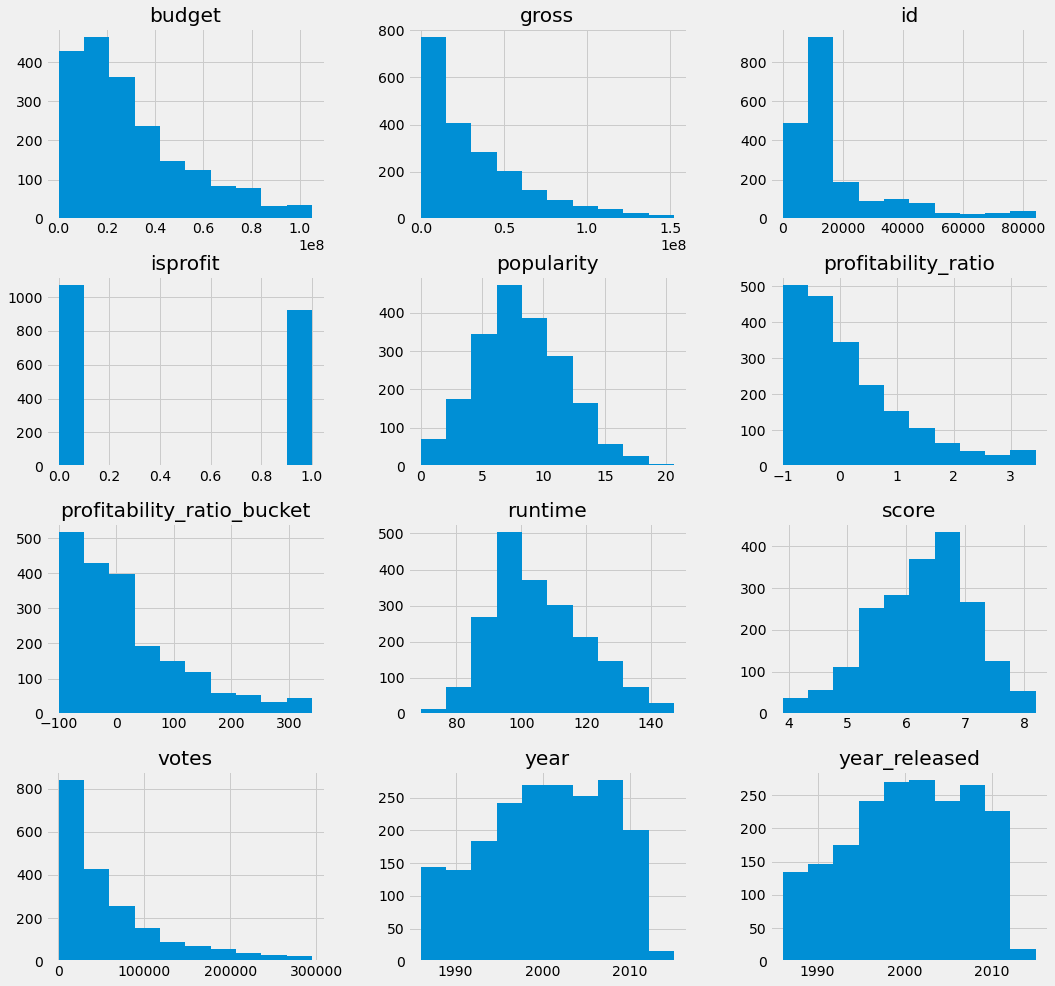

In [92]:
data_dropped_outlier_IQR.hist(figsize=(16, 16))

Figure 6: Histogram of Data Before Normalization
<p>Figure 6 shows the bar charts helping us visualize the data befor the five features above have been normalized.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD062E2640>,
      dtype=object)

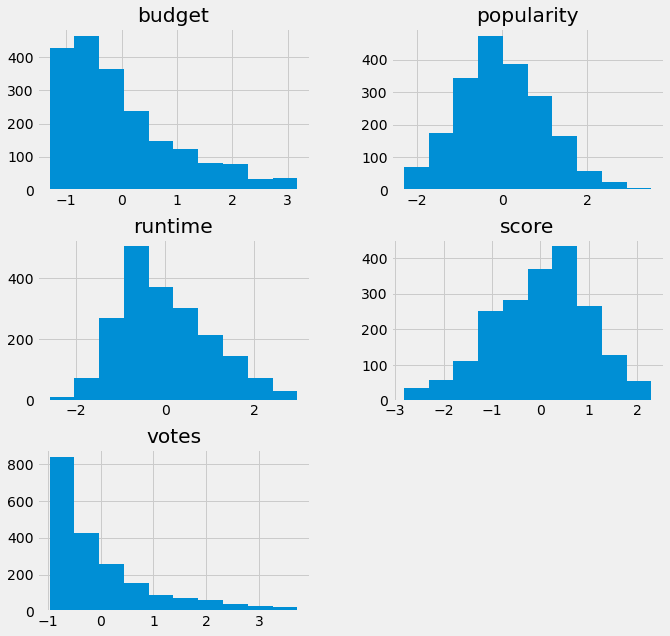

In [93]:
data_dropped_z_score_scaled.hist(figsize=(10, 10))

Figure 7: Histogram of Data After Normalization
<p>Figure 7 shows bar charts helping us visualize the data after the five features above have been normalized.</p>

Add normalized columns to main dataset as new columns labeled with the feature name they relate to followed by "_norm".

In [94]:
norm_column_names = ['budget_norm', 'runtime_norm', 'score_norm', 'votes_norm', 'popularity_norm']
    
for i, j in zip(norm_column_names, continuous_features):
    data_dropped_outlier_IQR[i] = pd.Series(data_dropped_z_score_scaled[j])


# 4. Results <a class="anchor" id="4"></a>

## 4.1. Data Cleaning <a class="anchor" id="41"></a>

As we analyze all the features in <a href="#21">Section 2.1.</a> we can see that the only features that need cleaning are overview, tagline, spoken_languages_edited, production_countries_edited and keywords_edited. The rest of the features are clean meaning not missing any values that require either dropping or replacement of those values.

## 4.2. Data Transformation <a class="anchor" id="42"></a>

After analyzing and cleaning the five categorical features found in <a href="#21">Section 2.1.</a> we are able to focus on transforming our data.  

<p>Our data includes categorical and continuous types but for transformation we want to focus on five that need to be discretized and normalized in order to be ready for modeling. These five features include budget, runtime, score, votes and popularity. The reason for discretizing the data is so we can partition the data into equal distributions that will be easier to manage and manipulate. After that we can use normalization to give all the attributes an equal weight which is useful to us in the following section where we model our data.</p>